In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

E:\ancnda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
dta=sm.datasets.fair.load_pandas().data

In [5]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
dta['affair']=(dta.affairs>0).astype(int)

In [7]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [9]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Text(0,0.5,'Frequency')

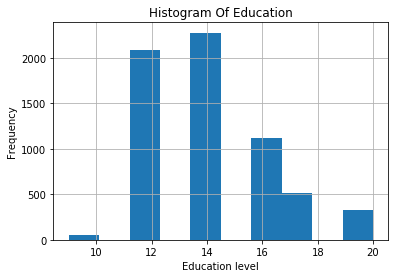

In [10]:
dta.educ.hist()
plt.title('Histogram Of Education')
plt.xlabel('Education level')
plt.ylabel('Frequency')


Text(0,0.5,'Frequency')

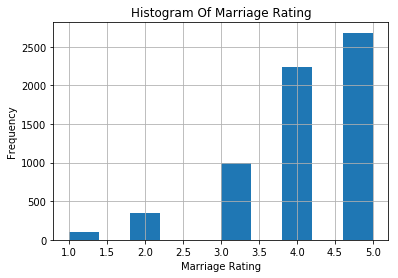

In [11]:
# Histogram Of Marriage Rating
dta.rate_marriage.hist()
plt.title('Histogram Of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')


Text(0,0.5,'Frequency')

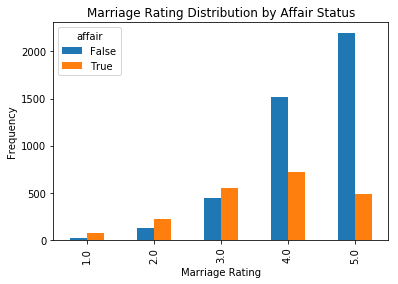

In [12]:
pd.crosstab(dta.rate_marriage,dta.affair.astype(bool)).plot(kind='bar')

plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

In [14]:
y,X=dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation_husb)',dta,return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [16]:
X=X.rename(columns={'C(occupation)[T.2.0]':'occ_2',
                    'C(occupation)[T.3.0]':'occ_3',
                    'C(occupation)[T.4.0]':'occ_4',
                    'C(occupation)[T.5.0]':'occ_5',
                    'C(occupation)[T.6.0]':'occ_6',
                    'C(occupation_husb)[T.2.0]':'occ_husb_2',
                    'C(occupation_husb)[T.3.0]':'occ_husb_3',
                    'C(occupation_husb)[T.4.0]':'occ_husb_4',
                    'C(occupation_husb)[T.5.0]':'occ_husb_5',
                    'C(occupation_husb)[T.6.0]':'occ_husb_6',

                    
                   })

In [17]:
y=np.ravel(y)

In [18]:
model=LogisticRegression()
model=model.fit(X,y)
model.score(X,y)

0.7211749921457744

In [19]:
y.mean()

0.3224945020420987

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
model2=LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
predicted=model2.predict(X_test)
print(predicted)

[1. 0. 0. ... 0. 0. 0.]


In [23]:
probability=model2.predict_proba(X_test)
print(probability)

[[0.36528496 0.63471504]
 [0.91394233 0.08605767]
 [0.68966526 0.31033474]
 ...
 [0.52632306 0.47367694]
 [0.77389484 0.22610516]
 [0.76683565 0.23316435]]


In [27]:
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test,probability[:,1]))

0.7219895287958115
0.7439010975811744


In [29]:
scores=cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=10)
print(scores)
print(scores.mean())

[0.72884013 0.71003135 0.74137931 0.70754717 0.69025157 0.72012579
 0.72798742 0.69811321 0.73899371 0.74842767]
0.7211697324579562
